In [63]:
"""ONLY USED FOR FINDING STOCKS"""

names=[x for x,y in zip(stocks["Name"].value_counts().sort_values(ascending=False).index,\
                        stocks["Name"].value_counts().sort_values(ascending=False).values) if y>1]


# [x for x in stocks["Name"] if x[0:3]=="Mat"] #-->Additional Search Method; looks for first three letters

#Finds all instances of a company name within stocks["Name"], and prints the instance and its index numer
for name in names:
    i=0
    while i<len(stocks):
        if stocks.loc[i,"Name"]==name:
            print "index: ",i
            print stocks.iloc[i]
            print "\n"
        i+=1
# top=stocks.index
# keep=[]
# for x in top:
#     if x not in del_indices:
#         keep.append(x)
# len(keep)

In [64]:
[x for x in stocks["Name"] if x[0:7]=="Lockhee"] #-->Additional Search Method; looks for first three letters

['Lockheed Martin']

In [23]:
import pandas as pd
import numpy as np
import requests
import bs4
import pandas as pd
from bs4 import BeautifulSoup
import datetime
import urllib
import statsmodels.api as sm
from sklearn import linear_model
import sklearn
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statsmodels.api as sm
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
% matplotlib inline
lm = linear_model.LinearRegression()
LR=sklearn.linear_model.LogisticRegression
LRCV=sklearn.linear_model.LogisticRegressionCV

In [465]:
def cap(x):
    value=0
    if x is np.NAN:
        value="Unknown"
    elif x>3000:
        value="Hugecap"
    elif x>500:
        value="Largecap"
    elif x>100:
        value="Midcap"
    else:
        value="Smallcap"
    return value
def create_bins(low,high,n):
    increment=(high-low)/float(n)
    bins=[]
    for i in range(n+1):
        bins.append(low+increment*(i))
    replacements=[]
    i=0
    while i<len(bins)-1:
        replacements.append(str(int(round(bins[i])))+"-"+str(int(round(bins[i+1]))))
        i+=1
    return bins,replacements
def salary_bin(bins,replacements,x):
    i=0
    value=0
    while i<len(bins)-1:
        if x<=int(round(bins[i+1])):
            value=replacements[i]
            i=len(bins)
        i+=1
    if value==0:
        value=str(bins[-1])+"+"
    return value
def only_numerics(seq):
    seq = seq.split('-')
    try:
        out = ((int(filter(type(seq[0]).isdigit, seq[0])) + int(filter(type(seq[1]).isdigit, seq[1])))/2)*1000
    except:
        out = int(filter(type(seq[0]).isdigit, seq[0]))
    return out


In [25]:
import pandas as pd
import numpy as np

#Cleans up the Stock information
nyse=pd.read_csv("Data/NYSE.csv")
nasdaq=pd.read_csv("Data/NASDAQ.csv")
amex=pd.read_csv("Data/AMEX.csv")
stocks=nyse.append(nasdaq,ignore_index=True).append(amex,ignore_index=True)
del stocks["Summary Quote"]
i=0
while i<len(stocks["Symbol"]):
    if " (The)" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" (The)")]
    if " Incorporated" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Incorporated")]
    if ", Inc." in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(", Inc.")]
    if ", Inc" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(", Inc")]
    if ", INC" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(", Inc")]
    if " Inc." in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Inc.")]
    if " Inc" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Inc")]
    if " INC" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Inc")]
    if  " Corporation" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corporation")]
    if " Corp." in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corp.")]
    if " Corp" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corp")]
    if " CORP" in stocks.iloc[i,1]:
        stocks.iloc[i,1]=stocks.iloc[i,1][:len(stocks.iloc[i,1])-len(" Corp")]
    i+=1

#Eliminates Duplicates, inactive tickers, and funds
#For MarketCap n/a; the tickers listed had 1 market value and all other duplicates were n/a; safe to remove
#Additionally, there was the occasional case of no market cap; market cap must have been insignificant or bankrupt
#stocks= stocks[stocks['MarketCap']!="n/a"]
#stocks= stocks[stocks['industry']!="n/a"]
#stocks= stocks[stocks['Sector']!="n/a"]
#stocks= stocks[stocks['IPOyear']!="n/a"]

#Convert MarketCap to Millions of dollars
i=0
while i<len(stocks["MarketCap"]):
    if "B" in str(stocks.iloc[i,3])[-1:]:
        stocks.iloc[i,3]=float(str(stocks.iloc[i,3])[1:-1])*1000
    else:
        stocks.iloc[i,3]=str(stocks.iloc[i,3])[1:-1]
    i+=1

stocks=stocks.reset_index()
del stocks['index']
#delete={1572:'WYIGU',1001:'ANDAU',873:'FNFV',1322:'ELECU',1376:'FCFS',1134:'CLACU',2041:'TRTLU',1706:'MSG'}
# keys=delete.keys()
# keys.sort()
# keys=keys[::-1]
# for key in keys:
#     stocks=stocks.iloc[:key].append(stocks.iloc[key+1:])
# stocks=stocks.reset_index()
# del stocks['index']

#Cleans cities data (eliminates counties and combined cities/towns)
cities=pd.read_csv("Data/Living_Index.csv")
cities=cities.rename(columns={"Urban Area":"City"})
values=[]
for x in cities["City"]:
    if "-" in x:
        values.append(False)
    else:
        values.append(True)
cities=cities[values]
values=[]
for x in cities["City"]:
    if "county" in x.lower():
        values.append(False)
    else:
        values.append(True)
cities=cities[values]
new_city_list=[]

for x in cities["City"]:
    y=x[-4:]
    z=x[:-len(y)].replace(",","")+y
    new_city_list.append(z)
cities["City"]=new_city_list

In [26]:
#Put ticker of name instances into a dictionary for all duplicates

#Gives the duplicates in a list called names
names=[x for x,y in zip(stocks["Name"].value_counts().sort_values(ascending=False).index,\
                        stocks["Name"].value_counts().sort_values(ascending=False).values) if y>1]
indices=[]
index=[]
dic={}
i=0
while i < len(stocks["Name"]):
    if stocks.loc[i,"Name"] in names:
        if stocks.loc[i,"Name"] in dic.keys():
            dic[stocks.loc[i,"Name"]].append([stocks.loc[i,"Symbol"],stocks.loc[i,"MarketCap"]])
        else:
            dic[stocks.loc[i,"Name"]]=[[stocks.loc[i,"Symbol"],stocks.loc[i,"MarketCap"]]]
    i+=1

#Look up to see if there is a single entry with a market cap for the duplicates; if there is, delete others

#Checks to see if among duplicate entries there is only a single one with market cap
caps=[]
for key in dic.keys():
    l=dic[key]
    single_cap=False
    num_caps=0
    for x in l:
        if x[1]!="/":
            num_caps+=1
        if num_caps==1:
            single_cap=True
        else: 
            single_cap=False
    caps.append([key,single_cap])

#Finds tickers without market cap to delete
delete=[]
for x in caps:
    if x[1]==True:
            #If there is a single market cap value, deletes all others
        for y in dic[x[0]]:
            if y[1]=="/":
                delete.append(y[0])
    if x[1]==False:
            #Checks to see if there are duplicate market cap values; if there are, resorts to largest
        mult=False
        count=0
        for y in dic[x[0]]:
            if y[1]!="/":
                count+=1
            if count>1:
                mult=True
        largest=0
        save_ticker=""
        if mult:
            for y in dic[x[0]]:
                if y[1]!="/":
                    if y[1]>largest:
                        largest=y[1]
                        save_ticker=y[0]
            for z in dic[x[0]]:
                if z[0]!=save_ticker:
                    delete.append(z[0])
            #If there are no market cap values, resorts to shortest ticker name
        else:
            save_ticker=""
            length=10
            for y in dic[x[0]]:
                if len(y[0])<length:
                    save_ticker=y[1]
            for z in dic[x[0]]:
                if z[0]!=save_ticker:
                    delete.append(z[0])

#NOW, time to go through and delete the unneeded rows; 
    #reset the index, get the indices, reverse order the sort,
    #and reset the dataframe on each value; then reset index

indices=[]
i=0
while i<len(stocks):
    if stocks.loc[i,"Symbol"] in delete:
        indices.append(i)
    i+=1
indices.sort()
indices=indices[::-1]
for key in indices:
    stocks=stocks.iloc[:key].append(stocks.iloc[key+1:])
stocks=stocks.reset_index()
del stocks['index']

#There is only one case left; where there are duplicate entries; let's delete those now
names=[x for x,y in zip(stocks["Name"].value_counts().sort_values(ascending=False).index,\
                        stocks["Name"].value_counts().sort_values(ascending=False).values) if y>1]
delete=[]

for name in names:
    first=True
    i=0
    while i<len(stocks["Name"]):
        if first:
            first=False
        if stocks.loc[i,"Name"]==name:
            delete.append(i)
        i+=1
delete.sort()
delete=delete[::-1]
for key in delete:
    stocks=stocks.iloc[:key].append(stocks.iloc[key+1:])
stocks=stocks.reset_index()
del stocks['index']

In [85]:
#Takes in json of webscraped information, puts it into a dataframe, converts Salary information to integers
glass_door=pd.DataFrame(columns=["Salary","Company","Location"])

extension="Data/allcities.json"
json=pd.read_json(extension)
df=pd.DataFrame([json["city"],json["company"],json["meanPay"],json["jobTitle"]]).T
# l=[]
# i=0
# j=0
# while i< len(json):
#     j=0
#     while j< len(json.iloc[i]):
#         if type(json.iloc[i,j])==dict:
#             l.append(json.iloc[i,j])
#         j+=1
#     i+=1
# #for x in new_city_list:
# salary=[x["meanPay"] for x in l]
# company=[x["company"] for x in l]
# location=[x["city"] for x in l]
# df=pd.DataFrame([salary,company,location]).T
df.columns=["Location","Company","Salary","Job"]
temp=[]


df['Salary'] = df['Salary'].apply(only_numerics)
df=df[pd.notnull(df["Salary"])].reset_index()
del df['index']
df["Salary"]=df['Salary'].astype(np.float)#

glass_door=glass_door.append(df,ignore_index=True)

df=pd.merge(glass_door,cities,left_on="Location",right_on="City")
df=pd.merge(df,stocks,left_on="Company",right_on="Name",how='inner')
i=0
delete=[]
for x in df["Salary"]:
    if x<10000:
        delete.append(i)
    i+=1
delete.sort()
delete=delete[::-1]
for key in delete:
    df=df.iloc[:key].append(df.iloc[key+1:])
df=df.reset_index()
del df['index']

df['Salary']=df['Salary'].astype(np.int)
df.columns


# todrop=["Software Engineer (Data Scientist)","Data Visualization Scientist",\
#         "Scientist, Statistical and Data Sciences","Associate Data Scientist","Data Scientist Intern - Hourly",\
#         "Data Scientist Intern"]


df["Senior"]=[1 if x else 0 for x in df["Job"]==("Senior Data Scientist")]
df["Mid"]=[1 if x else 0 for x in df["Job"]==("Data Scientist" or "Principal Data Scientist")]
#df["Junior"]=[1 if x else 0 for x in df["Job"]==("Data Scientist I" or "Junior Data Scientist" 
#                                                 or "Data Scientist II")]
df["Large"]=[1 if x else 0 for x in df["MarketCap"]>=500]
df["Small"]=[1 if x else 0 for x in df["MarketCap"]<100]
i=0
while i<len(df):
    if df.loc[i,"MarketCap"] is np.NAN:
        df.loc[i,"MarketCap"]=350
    i+=1
df["MarketCap"]=df["MarketCap"].astype(np.float)

copy=df.copy()
print len(df[df["Senior"]==1])
print len(df[df["Mid"]==1])

92
240


In [73]:
240/92.

2.608695652173913

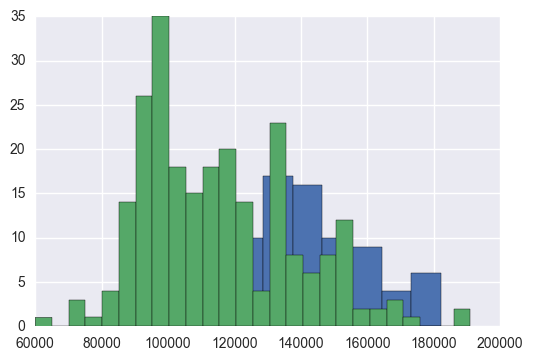

In [76]:
plt.hist(df[df["Senior"]==1]["Salary"],bins=10);
plt.hist((df[df["Mid"]==1]["Salary"]),bins=26);

In [93]:
n=3
increment=(199000-48000.)/float(n)
bins=[48000,85750,148667,199000]
bins=[]
for i in range(n+1):
    bins.append(48000+increment*(i))

replacements=[]
i=0
while i<len(bins)-1:
    replacements.append(str(int(round(bins[i])))+"-"+str(int(round(bins[i+1]))))
    i+=1
    

df=copy.copy()
df["Salary"]=df['Salary'].apply(lambda x: salary_bin(x))
df1=pd.get_dummies(df,columns=["Salary"])

cols=['100% Composite Index','Senior',"Mid","Large"]
# for y in [x for x in df1.columns[20:]]:
#     cols.append(y) 
    
    
X_train,X_test,y_train,y_test=train_test_split(df1[cols],df['Salary'],test_size=.4)#,random_state=69
""" Fit a binary classification predictor."""
logreg = LogisticRegression(solver='lbfgs') #'newton-cg', 'lbfgs', 'liblinear', 'sag'
C_vals = [10**x for x in range (-5,5)]
penalties = ['l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=3)
gs.fit(X_train, y_train)

logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, y_train)
cv_pred = cv_model.predict(X_test)

y_score = cv_model.decision_function(X_test) # Submit these response, the output of model.decision_function

""" Check your performance so far."""

conmat = np.array(confusion_matrix(y_test, cv_pred))
confusion = pd.DataFrame(conmat, index=replacements, columns=replacements)

print(confusion)
print classification_report(y_test,cv_pred)
print cv_model.coef_

               48000-98333  98333-148667  148667-199000
48000-98333              0             0             30
98333-148667             0             0             39
148667-199000            0             0             89
               precision    recall  f1-score   support

148667-199000       0.00      0.00      0.00        30
  48000-98333       0.00      0.00      0.00        39
 98333-148667       0.56      1.00      0.72        89

  avg / total       0.32      0.56      0.41       158

[[ -1.02951861e-02   4.55838023e-05  -2.11933942e-04  -1.66743390e-04]
 [ -8.63202431e-03  -1.15156881e-04   9.52776128e-05  -1.19436710e-05]
 [  2.71291498e-03   3.68842297e-05   2.31250892e-06   1.24653008e-05]]


In [ ]:
""" Fit a binary classification predictor."""
logreg = LogisticRegression(solver='liblinear') #'newton-cg', 'lbfgs', 'liblinear', 'sag'
C_vals = [10**x for x in range (-5,5)]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=3)
gs.fit(X_train, y_train)

logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, y_train)
cv_pred = cv_model.predict(X_test)

y_score = cv_model.decision_function(X_test) # Submit these response, the output of model.decision_function

""" Check your performance so far."""

conmat = np.array(confusion_matrix(y_test, cv_pred))
confusion = pd.DataFrame(conmat, index=replacements,
                            columns=replacements)

print(confusion)
print classification_report(y_test,cv_pred)


In [224]:
roc_auc_score(y_test, y_score)

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income', fontsize=18)
plt.legend(loc="lower right")
plt.show()

ValueError: continuous format is not supported

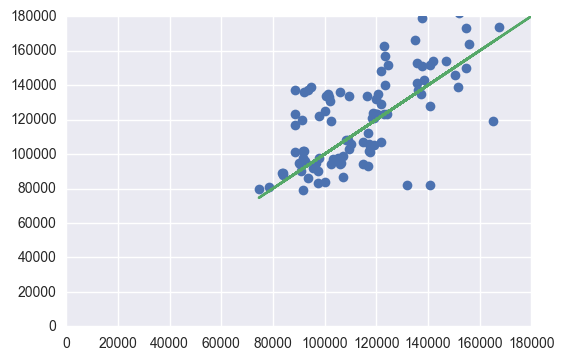

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.963     
Dependent Variable: Salary           AIC:                6816.0834 
Date:               2016-10-17 17:09 BIC:                6830.8448 
No. Observations:   296              Log-Likelihood:     -3404.0   
Df Model:           4                F-statistic:        1914.     
Df Residuals:       292              Prob (F-statistic): 4.45e-208 
R-squared:          0.963            Scale:              5.7854e+08
--------------------------------------------------------------------
        Coef.      Std.Err.     t     P>|t|     [0.025      0.975]  
--------------------------------------------------------------------
x1      754.2977    27.3167  27.6130  0.0000    700.5350    808.0604
x2        0.0828     0.0085   9.6977  0.0000      0.0660      0.0997
x3    30833.3325  4336.6601   7.1099  0.0000  22298.2588  39368.4061
x4    16945.0181  3513.1597   4.8233  0.0000  10030.6933  23

In [258]:
#Linear Regression
xtr=x_train
xte=x_test
ytr=y_train
yte=y_test

xtr=np.array(xtr).reshape(len(xtr),4)
xte=np.array(xte).reshape(len(xte),4)
xtr2=sm.add_constant(xtr)
model=sm.OLS(ytr,xtr).fit()

xte2=sm.add_constant(xte)
pred=model.predict(xte)

plt.plot(pred,yte,'o')
plt.plot(pred,pred,'-')
plt.xlim(0,180000)
plt.ylim(0,180000)
plt.show()

print model.summary2()

In [528]:
temp=xtr[:len(xtr)/3]
plt.hist(xte["100% Composite Index"],bins=5)
plt.hist(temp["100% Composite Index"],bins=5)
plt.show()

/Users/thomas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [416]:
df.iloc[730]

Salary                                           138500
Company                                     Capital One
Location                                 Wilmington, DE
City                                     Wilmington, DE
100% Composite Index                              105.2
13 % Grocery Items                                108.1
29 % Housing                                        102
10% Utilities                                     115.4
12 % Transportation                                98.6
4% Health Care                                    108.7
32 % Miscellaneous Goods and Services             105.2
Name: 730, dtype: object

For the logistic regressions, make the discrete value a bin; the smallest bin will be 0. The goal should be to make the bins be organized so that a linear plot can be drawn through them. If the linear plot does not run through them, then there is significant risk of misidentifying a bin. Depending on what the x-axis is (most-likely score), the bins will have to have an equal width along this x-axis (i.e., all bins having a width of x-units on the x-axis).

Contrarily, we want evenly distributed bins in the price aspect.

So, if one were to not do a multinomial logistic regression, one could additionally do a series of logistic regressions. One would check to see if the point goes into bin 0 or 1. If it goes into 1, one would check to see if it goes into bins 1 or 2. If it is in bin 2, one would see if it goes into bins 2 or 3... If it does not go into the higher bin, the regression sequence ends, and the point enters the lower of the two bins.
### Scratch ^; essentially a multinomial logistic regression

In [201]:
df.head()

,Company,Job,Location,Salary,City,100% Composite Index,13 % Grocery Items,29 % Housing,10% Utilities,12 % Transportation,...,32 % Miscellaneous Goods and Services,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Senior,Mid
0,GE,Data Scientist,"Albany, NY",104000,"Albany, NY",108.1,105.0,112.6,101.0,102.8,...,108.6,NaN,NaN,NaN,250.0,NaN,NaN,NaN,0,1
1,State Farm,Data Scientist,"Arlington, TX",105000,"Arlington, TX",99.3,94.4,89.4,109.9,98.3,...,106.4,NaN,NaN,NaN,250.0,NaN,NaN,NaN,0,1
2,Epsilon,Data Scientist,"Arlington, TX",166500,"Arlington, TX",99.3,94.4,89.4,109.9,98.3,...,106.4,NaN,NaN,NaN,250.0,NaN,NaN,NaN,0,1
3,Match,Data Scientist,"Arlington, TX",82500,"Arlington, TX",99.3,94.4,89.4,109.9,98.3,...,106.4,NaN,NaN,NaN,250.0,NaN,NaN,NaN,0,1
4,Hudl,Data Scientist,"Arlington, TX",90000,"Arlington, TX",99.3,94.4,89.4,109.9,98.3,...,106.4,NaN,NaN,NaN,250.0,NaN,NaN,NaN,0,1


In [146]:
#Merge Company Data and Location Data

In [203]:
i=0
bad_names=[]
while i<len(df):
    if df.loc[i,"IPOyear"] is np.NAN:
        bad_names.append(df.loc[i,"Company"])
    i+=1

In [229]:
i=2
print "Looked Up:",bad_names[i]
lookup="Epsilon"

print "Found:",[x for x in stocks["Name"] if lookup in x]


Looked Up: Epsilon
Found: []


In [207]:
lookup

u'GE'

In [ ]:
change={"General Electric Company":"GE", }

In [98]:
todrop=["Software Engineer (Data Scientist)","Data Visualization Scientist",\
        "Scientist, Statistical and Data Sciences","Associate Data Scientist","Data Scientist Intern - Hourly",\
        "Data Scientist Intern"]


In [101]:
for x in todrop:
    glass_door=glass_door[glass_door["Job"]!=x]

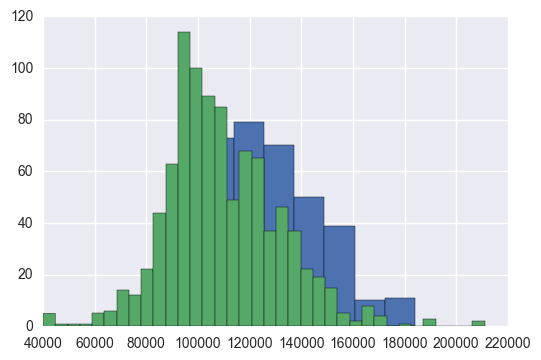

In [113]:
plt.hist(glass_door[glass_door["Job"]=="Senior Data Scientist"]["Salary"],bins=10)
plt.hist(glass_door[glass_door["Job"]=="Data Scientist"]["Salary"],bins=36);

In [117]:
glass_door=glass_door.merge(cities, left_on="Location", right_on="City")

In [119]:
glass_door["Normalized Salary"]=glass_door["Salary"]/glass_door["100% Composite Index"]

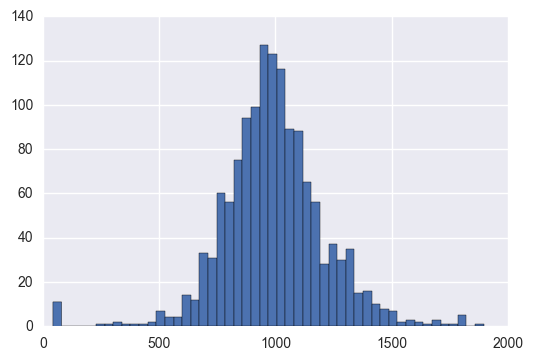

In [143]:
average=np.mean(glass_door["100% Composite Index"])
#\plt.hist(glass_door["Salary"]/average,width=50)
plt.hist(glass_door["Normalized Salary"],bins=50);

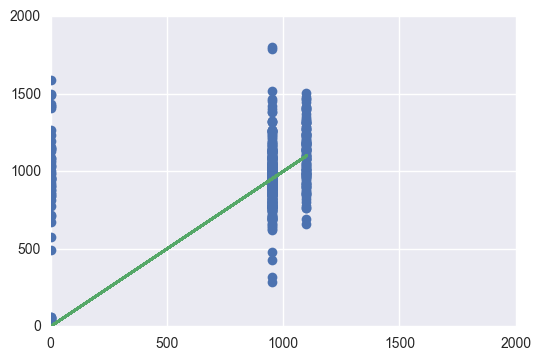

                   Results: Ordinary least squares
Model:              OLS               Adj. R-squared:     0.849     
Dependent Variable: Normalized Salary AIC:                13239.6585
Date:               2016-10-17 20:39  BIC:                13249.2522
No. Observations:   895               Log-Likelihood:     -6617.8   
Df Model:           2                 F-statistic:        2525.     
Df Residuals:       893               Prob (F-statistic): 0.00      
R-squared:          0.850             Scale:              1.5525e+05
----------------------------------------------------------------------
         Coef.     Std.Err.      t      P>|t|      [0.025      0.975] 
----------------------------------------------------------------------
x1     1099.8968    26.2680   41.8721   0.0000   1048.3425   1151.4511
x2      950.2097    16.5473   57.4238   0.0000    917.7335    982.6858
--------------------------------------------------------------------
Omnibus:               286.299       Durbi

In [166]:
df=glass_door.copy()
df["Senior"]=[1 if x else 0 for x in df["Job"]==("Senior Data Scientist" or "Principal Data Scientist")]
df["Mid"]=[1 if x else 0 for x in df["Job"]==("Data Scientist")]
    
#df=df[df["Job"]==("Data Scientist" or "Principal Data Scientist" or "Senior Data Scientist")]
cols=['Senior',"Mid"]
    
    
x_train,x_test,y_train,y_test=train_test_split(df[cols],df['Normalized Salary'],test_size=.35,random_state=70)
""" Fit a binary classification predictor."""
#Linear Regression
xtr=x_train
xte=x_test
ytr=y_train
yte=y_test

xtr=np.array(xtr).reshape(len(xtr),2)
xte=np.array(xte).reshape(len(xte),2)
xtr2=sm.add_constant(xtr)
model=sm.OLS(ytr,xtr).fit()

xte2=sm.add_constant(xte)
pred=model.predict(xte)

plt.plot(pred,yte,'o')
plt.plot(pred,pred,'-')
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.show()

print model.summary2()

MergeError: No common columns to perform merge on

In [200]:
df=glass_door.copy()
df.merge(stocks, how='outer')
df["Senior"]=[1 if x else 0 for x in df["Job"]==("Senior Data Scientist" or "Principal Data Scientist")]
df["Mid"]=[1 if x else 0 for x in df["Job"]==("Data Scientist")]
    
#df=df[df["Job"]==("Data Scientist" or "Principal Data Scientist" or "Senior Data Scientist")]
cols=['Senior',"Mid"]
    
    
x_train,x_test,y_train,y_test=train_test_split(df[cols],df['Normalized Salary'],test_size=.35,random_state=70)
""" Fit a binary classification predictor."""
#Linear Regression
xtr=x_train
xte=x_test
ytr=y_train
yte=y_test

xtr=np.array(xtr).reshape(len(xtr),2)
xte=np.array(xte).reshape(len(xte),2)
xtr2=sm.add_constant(xtr)
model=sm.OLS(ytr,xtr).fit()

xte2=sm.add_constant(xte)
pred=model.predict(xte)

plt.plot(pred,yte,'o')
plt.plot(pred,pred,'-')
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.show()

print model.summary2()

MergeError: No common columns to perform merge on

In [466]:
df=glass_door.copy()
df=df.merge(stocks, how='left',left_on="Company",right_on="Name")
df=df[df["Job"]==("Senior Data Scientist" or "Principal Data Scientist" or "Data Scientist")]
df["Sector"]=["Technology" if pd.isnull(x) else x for x in df["Sector"]]
df["MarketCap"]=df["MarketCap"].apply(lambda x: cap(x))

In [467]:
df2=pd.get_dummies(df,columns=["Sector","Job","MarketCap"])
delete=[u'industry',u'Company', u'Location', u'Salary', u'City',
       u'Symbol', u'Name', u'LastSale', u'IPOyear',u'Normalized Salary',u'100% Composite Index'] 
#u'13 % Grocery Items', u'29 % Housing',
#      u'10% Utilities', u'12 % Transportation', u'4% Health Care',
#       u'32 % Miscellaneous Goods and Services',
for x in delete:
    del df2[x]
temp=pd.DataFrame(df["Normalized Salary"].copy(),columns=["Normalized Salary"])

#ENTER BINS BELOW
bin_NUMBER=3

bins,replacements=create_bins(min(temp["Normalized Salary"]),max(temp["Normalized Salary"]),bin_NUMBER)
temp["Normalized Salary"]=temp["Normalized Salary"].apply(lambda x: salary_bin(bins,replacements,x))
#df1=pd.get_dummies(temp,columns=["Normalized Salary"])
df1=temp["Normalized Salary"]

In [476]:
x_train,x_test,y_train,y_test=train_test_split(df2,df1,test_size=.35)
logreg = LogisticRegression(solver='lbfgs') #'newton-cg', 'lbfgs', 'liblinear', 'sag'
C_vals = [10**x for x in range (-5,5)]
penalties = ['l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, cv=3)
gs.fit(x_train, y_train)

logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(x_train, y_train)
cv_pred = cv_model.predict(x_test)

y_score = cv_model.decision_function(x_test) # Submit these response, the output of model.decision_function

""" Check your performance so far."""

conmat = np.array(confusion_matrix(y_test, cv_pred))
confusion = pd.DataFrame(conmat, index=replacements, columns=replacements)

print(confusion)
print classification_report(y_test,cv_pred)
print cv_model.coef_

           633-994  994-1356  1356-1717
633-994          5         0          4
994-1356         0        16         23
1356-1717        0         5         70
             precision    recall  f1-score   support

  1356-1717       1.00      0.56      0.71         9
    633-994       0.76      0.41      0.53        39
   994-1356       0.72      0.93      0.81        75

avg / total       0.75      0.74      0.72       123

[[ -1.60685479e-01  -5.96418227e-03  -2.05205531e-02  -1.02759985e-01
    6.74206976e-02  -1.43264092e-01  -1.91979348e+00   6.88147567e+00
    7.82873885e+00  -8.49829128e-01  -2.77221360e-01  -2.69854039e+00
    2.44473849e+00   1.14095687e+01   7.66956650e+00  -3.98423770e+00
    7.72423985e+00]
 [  5.85369951e-02   1.72469556e-02   1.59036539e-02   1.72478418e-02
   -9.33074065e-02   6.48989176e-02   2.45469696e+00  -2.48564365e-01
   -1.04471796e+00   2.66128124e+00  -3.05875873e+00  -3.25871714e+00
   -1.12965018e+00  -3.62443017e+00  -4.23707868e+00   2.45595

In [469]:
x_train2,x_test2,y_train2,y_test2=train_test_split(df2,df['Normalized Salary'],test_size=.35,random_state=70)

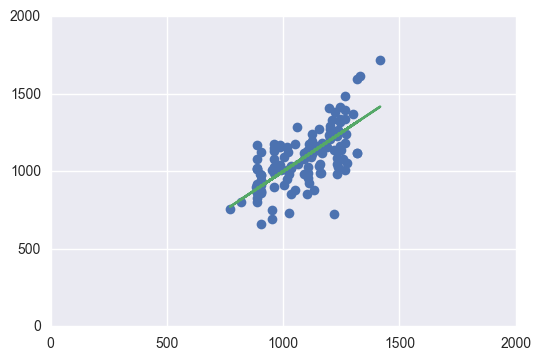

                  Results: Ordinary least squares
Model:              OLS               Adj. R-squared:     0.529    
Dependent Variable: Normalized Salary AIC:                2852.7082
Date:               2016-10-17 22:16  BIC:                2904.0824
No. Observations:   227               Log-Likelihood:     -1411.4  
Df Model:           14                F-statistic:        19.12    
Df Residuals:       212               Prob (F-statistic): 1.95e-30 
R-squared:          0.558             Scale:              15761.   
--------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
x1          -5.8506    1.9254  -3.0386  0.0027    -9.6459    -2.0552
x2          -0.8549    0.2023  -4.2261  0.0000    -1.2537    -0.4561
x3          -1.3905    0.6033  -2.3049  0.0221    -2.5797    -0.2013
x4          -2.6601    1.9251  -1.3818  0.1685    -6.4550   

In [470]:
""" Fit a binary classification predictor."""
#Linear Regression
xtr=x_train2
xte=x_test2
ytr=y_train2
yte=y_test2

xtr=np.array(xtr).reshape(len(xtr),len(df2.columns))
xte=np.array(xte).reshape(len(xte),len(df2.columns))
xtr2=sm.add_constant(xtr)
model=sm.OLS(ytr,xtr).fit()

xte2=sm.add_constant(xte)
pred=model.predict(xte)

plt.plot(pred,yte,'o')
plt.plot(pred,pred,'-')
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.show()

print model.summary2()

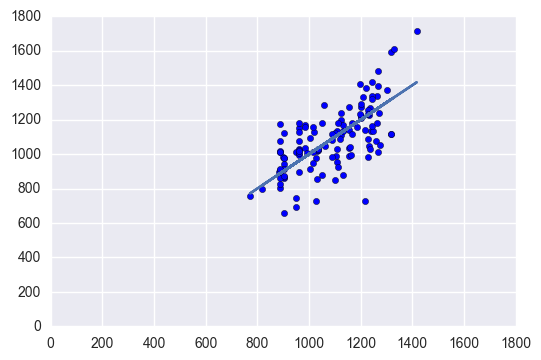

0.435532009421


13 % Grocery Items
-5.85055112561

29 % Housing
-0.854919438966

10% Utilities
-1.39050225752

12 % Transportation
-2.66014086537

4% Health Care
1.96795602463

32 % Miscellaneous Goods and Services
-2.1075890024

Sector_Capital Goods
-83.7308105569

Sector_Consumer Durables
31.828680913

Sector_Consumer Services
41.95135305

Sector_Finance
-142.169188718

Sector_Health Care
27.5509930978

Sector_Public Utilities
32.6182254861

Sector_Technology
91.9507467277

Job_Senior Data Scientist
0.0

MarketCap_Hugecap
126.319381

MarketCap_Largecap
-104.136931278

MarketCap_Unknown
-22.1824497214



In [474]:
ridge=Ridge(alpha=1) #Ridge is .28269 at 230
lasso=Lasso(alpha=1.01) #Lasso is 0.289105 at 2.01
lr=LinearRegression() #Linear Regression is .2763265
model=lr.fit(x_train2,y_train2)
pred=model.predict(x_test2)
plt.scatter(pred,y_test2)
plt.plot(pred,pred)
plt.ylim(0,1800)
plt.xlim(0,1800)
plt.show()
print model.score(x_test2, y_test2)
print "\n"
for x,y in zip(x_test2.columns,model.coef_):
    print x
    print y
    print